<a href="https://colab.research.google.com/github/anvesh-lp/BruteForce/blob/main/DataOptimizationNETFLIX_usingMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
!pip install --upgrade pandas-datareader
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 29.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('NFLX', data_source='yahoo', start='2016-01-01', end = "2021-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,110.000000,105.209999,109.000000,109.959999,20794800,109.959999
2016-01-05,110.580002,105.849998,110.449997,107.660004,17664600,107.660004
2016-01-06,117.910004,104.959999,105.290001,117.680000,33045700,117.680000
2016-01-07,122.180000,112.290001,116.360001,114.559998,33636700,114.559998
2016-01-08,117.720001,111.099998,116.330002,111.389999,18067100,111.389999


In [7]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2016-01-04,109.959999
2016-01-05,107.660004
2016-01-06,117.680000
2016-01-07,114.559998
2016-01-08,111.389999


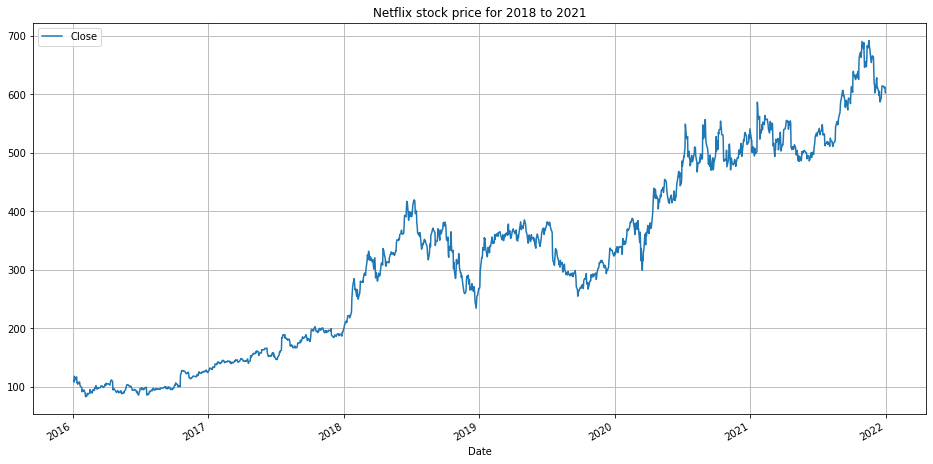

In [9]:
df.plot(figsize=(16,8), title = "Netflix stock price for 2018 to 2021", grid = True)

In [10]:
#Simple Moving Average

df['SMA_1'] = df.Close.rolling(7, min_periods=1).mean() #Period of 1 week
df['SMA_2'] = df.Close.rolling(14, min_periods=1).mean() #Period of 2 weeks
df['SMA_4'] = df.Close.rolling(28, min_periods=1).mean() #Period of 4 weeks

In [11]:
#Cumulative Moving Average

df['CMA'] = df.Close.expanding().mean()

In [12]:
df['EMA_0.1'] = df.Close.ewm(alpha=0.1, adjust=False).mean() #Smoothing factor - 0.1
df['EMA_0.3'] = df.Close.ewm(alpha=0.3, adjust=False).mean() #Smoothing factor - 0.3

In [13]:
df[2:]

,Close,SMA_1,SMA_2,SMA_4,CMA,EMA_0.1,EMA_0.3
Date,,,,,,,
2016-01-06,117.680000,111.766668,111.766668,111.766668,111.766668,110.525000,111.793000
2016-01-07,114.559998,112.465000,112.465000,112.465000,112.465000,110.928499,112.623100
2016-01-08,111.389999,112.250000,112.250000,112.250000,112.250000,110.974649,112.253170
2016-01-11,114.970001,112.703334,112.703334,112.703334,112.703334,111.374185,113.068219
2016-01-12,116.580002,113.257143,113.257143,113.257143,113.257143,111.894766,114.121754
...,...,...,...,...,...,...,...
2021-12-27,613.119995,602.557138,607.272138,629.775358,319.522674,615.336675,608.710855
2021-12-28,610.710022,605.364284,606.209996,627.036429,319.715769,614.874010,609.310605
2021-12-29,610.539978,608.765712,604.957136,624.138214,319.908495,614.440607,609.679417


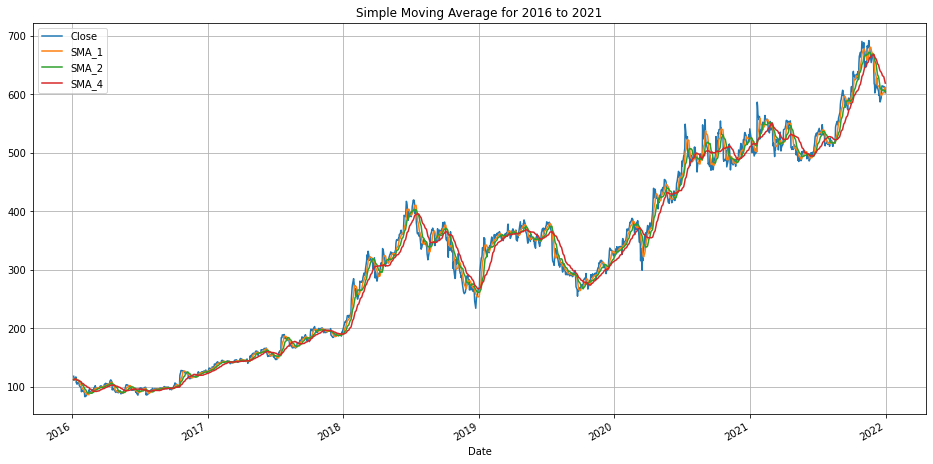

In [14]:
df[2:][['Close', 'SMA_1', 'SMA_2', 'SMA_4']].plot(figsize=(16,8), title = "Simple Moving Average for 2016 to 2021", grid = True)

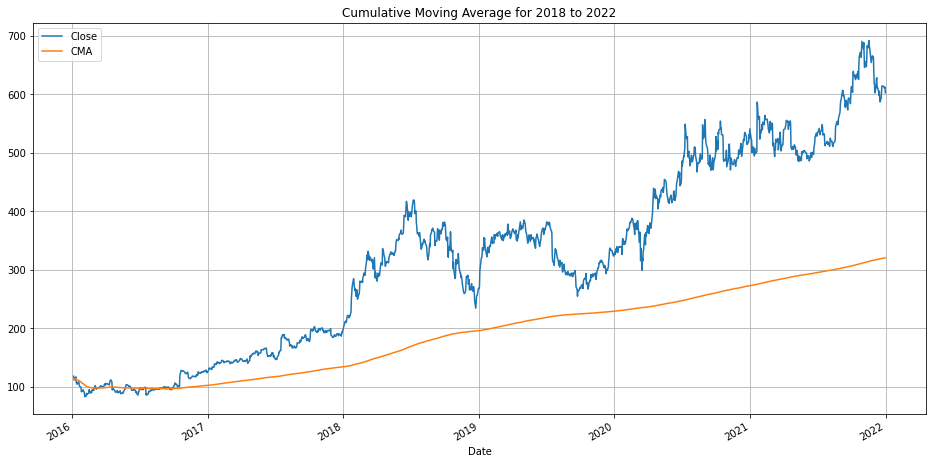

In [15]:
#Plotting Cumulative Moving Average for 2017 to 2019

df[2:][['Close', 'CMA']].plot(figsize=(16,8), title = "Cumulative Moving Average for 2018 to 2022", grid = True)

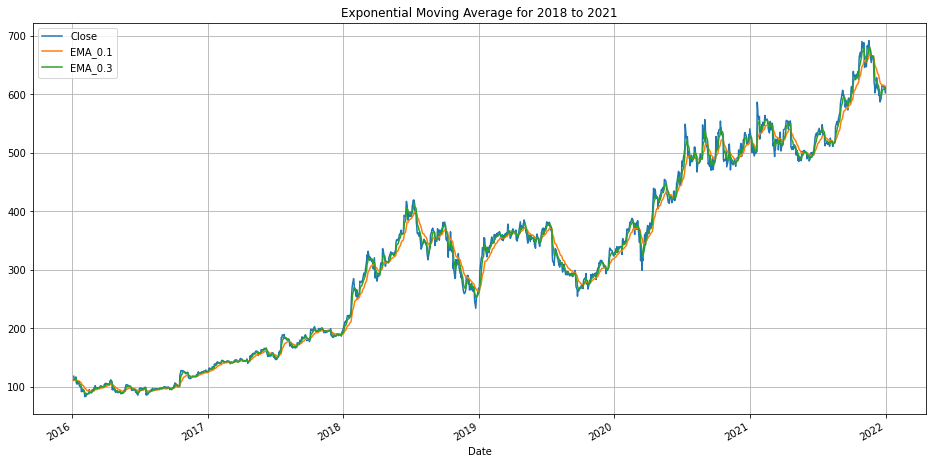

In [16]:
#Plotting Exponential Moving Average for 2017 to 2019

df[2:][['Close', 'EMA_0.1', 'EMA_0.3']].plot(figsize=(16,8), title = "Exponential Moving Average for 2018 to 2021", grid = True)

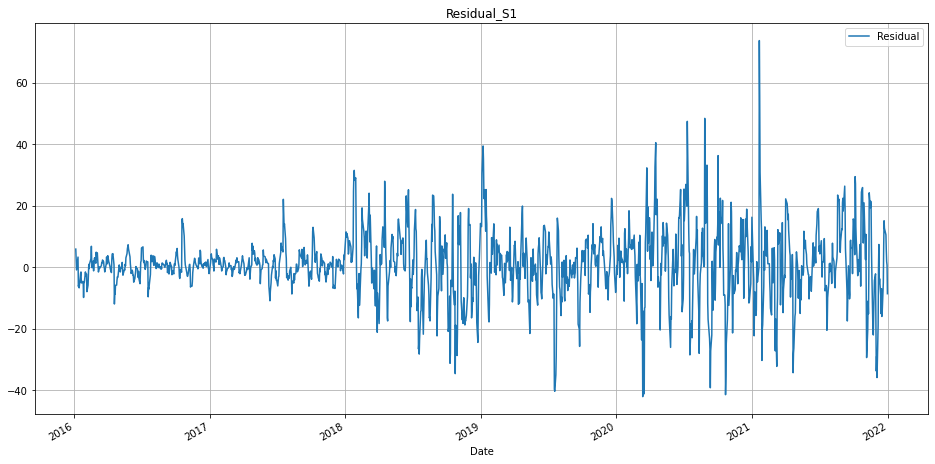

In [17]:
#Residual (Error) for SMA_1

res = df[2:]['Close'] - df[2:]['SMA_1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S1', figsize=(16,8), grid = True)

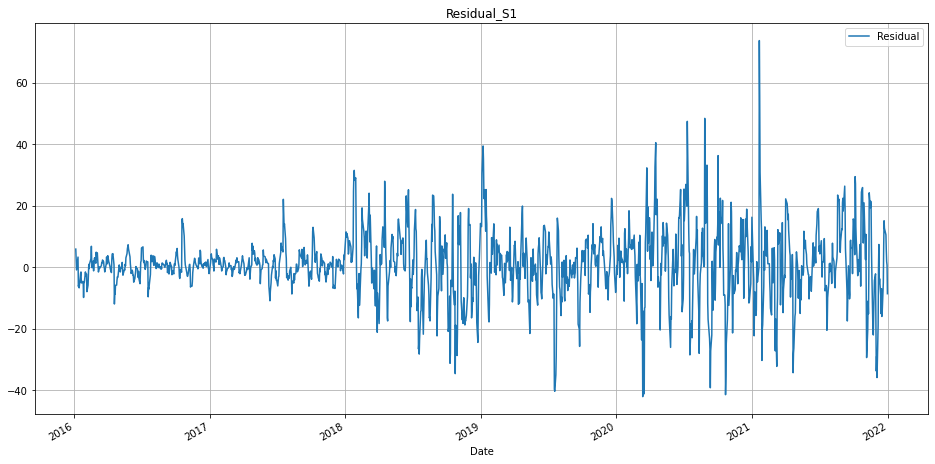

In [18]:
#Residual (Error) for SMA_1

res = df[2:]['Close'] - df[2:]['SMA_1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S1', figsize=(16,8), grid = True)

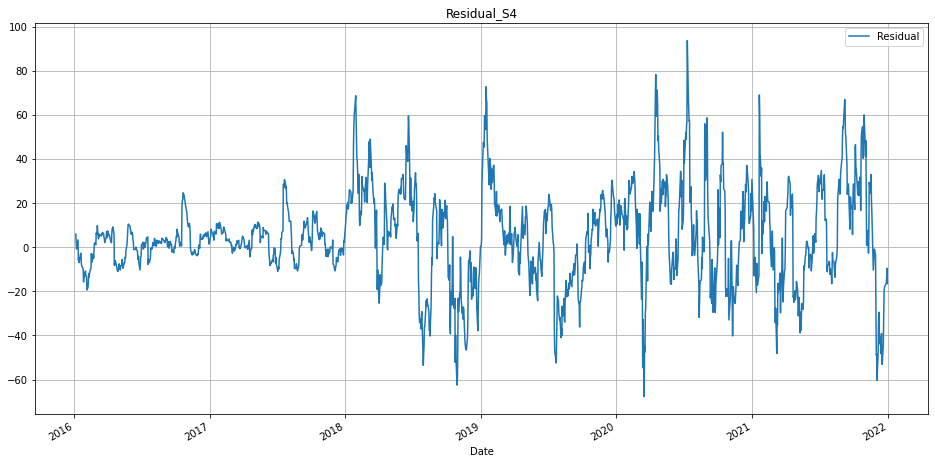

In [19]:
#Residual (Error) for SMA_4

res = df[2:]['Close'] - df[2:]['SMA_4']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S4', figsize=(16,8), grid = True)

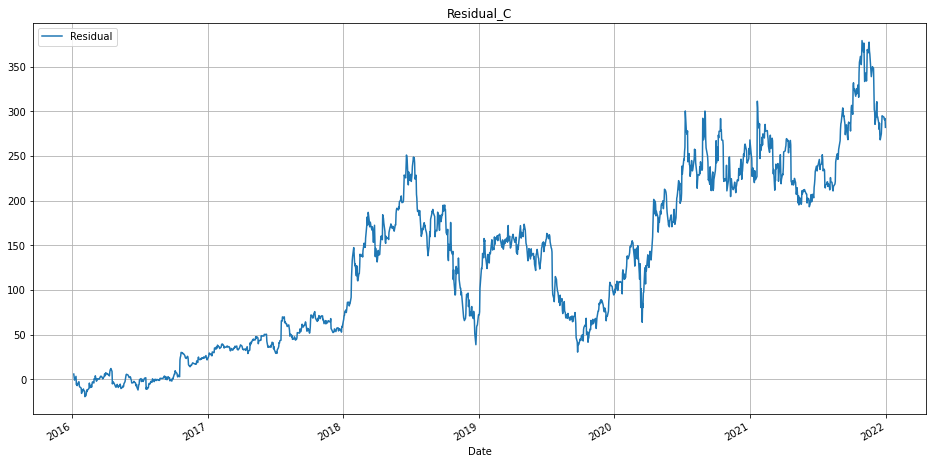

In [20]:
#Residual (Error) for CMA

res = df[2:]['Close'] - df[2:]['CMA']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_C', figsize=(16,8), grid = True)

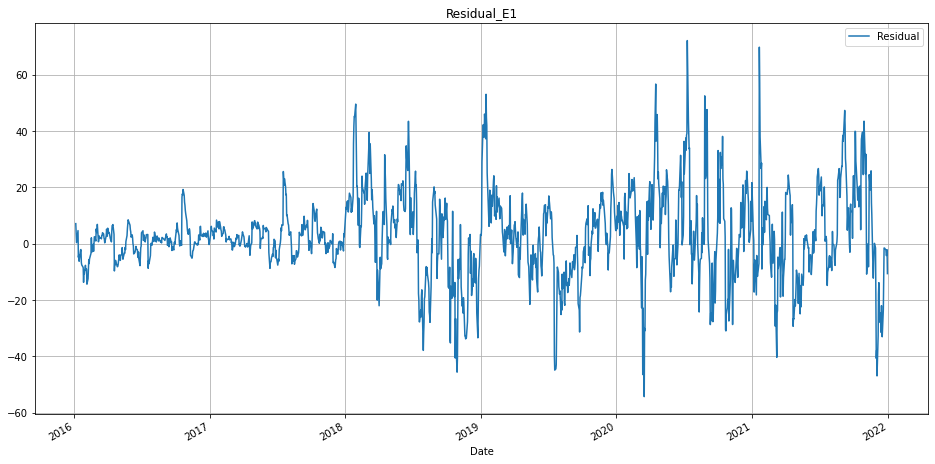

In [21]:
#Residual (Error) for EMA_0.1

res = df[2:]['Close'] - df[2:]['EMA_0.1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E1', figsize=(16,8), grid = True)

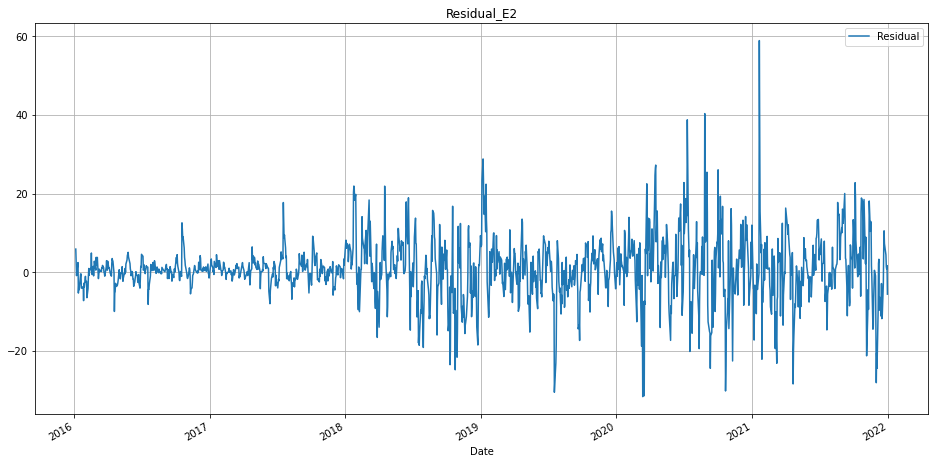

In [22]:
#Residual (Error) for EMA_0.3

res = df[2:]['Close'] - df[2:]['EMA_0.3']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E2', figsize=(16,8), grid = True)

In [23]:
df["S1"] = df[2:]['Close'] - df[2:]['SMA_1']
df["S2"] = df[2:]['Close'] - df[2:]['SMA_2']
df["S4"] = df[2:]['Close'] - df[2:]['SMA_4']

df["C"] = df[2:]['Close'] - df[2:]['CMA']

df["E1"] = df[2:]['Close'] - df[2:]['EMA_0.1']
df["E3"] = df[2:]['Close'] - df[2:]['EMA_0.3']

In [24]:
df[2:].mean()[7:]

S1      0.991412
S2      2.136602
S4      4.469278
C     129.695738
E1      3.001783
E3      0.771197
dtype: float64

In [25]:
#Root Mean Square Error(RMSE)

print("Root Mean Square Error for SMA_1:", round(np.sqrt(np.mean((df["S1"] ** 2))), 5))
print("Root Mean Square Error for SMA_2:", round(np.sqrt(np.mean((df["S2"] ** 2))), 5))
print("Root Mean Square Error for SMA_4:", round(np.sqrt(np.mean((df["S4"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for CMA:", round(np.sqrt(np.mean((df["C"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for EMA_1:", round(np.sqrt(np.mean((df["E1"] ** 2))), 5))
print("Root Mean Square Error for EMA_3:", round(np.sqrt(np.mean((df["E3"] ** 2))), 5))

Root Mean Square Error for SMA_1: 10.92801
Root Mean Square Error for SMA_2: 15.50047
Root Mean Square Error for SMA_4: 21.48519
Root Mean Square Error for CMA: 161.26192
Root Mean Square Error for EMA_1: 15.27027
Root Mean Square Error for EMA_3: 7.79392


In [26]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2:]['Close']
predictions = df[2:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 60.74518824863397
Mean Absolute Error(MAE): 5.255481147161053
Root Mean Square Error (RMSE): 7.7939199539534645
